In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import cv2
import math

In [16]:
# height and width of images
img_width,img_height = 250,80  
#increasing these variables increases quality and size of image
dim = (img_width, img_height)

# location of locally saved dataset
loc= "E:/Code data/Signatures/Dataset_Signature_Final/Dataset/"

# helper function to return black and white image ndarray on giving location
def returnimages(path,img):
    image=cv2.imread(path+"/"+ img)                  #bringing the image
    image=cv2.resize(image, (img_width, img_height))
    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image/255
    return image

def flatten(img):return img.reshape((img.size, 1))   # flatten numpy array of floats to 1d 

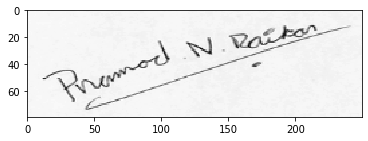

In [17]:
testimage = returnimages(loc+'dataset1/forge',"02100002.png")
plt.imshow(testimage,'gray')

In [25]:
# real signatures 1d array
real_sign = np.ndarray((210,img_width*img_height,1))
forged_sign = np.ndarray((210,img_width*img_height,1))
count_real =0
count_forged = 0
# importing 60 real signatures from dataset1
for i in range(1,13):
    for j in range(0,5):
        fird = str(i)
        if len(fird)== 1: fird='0'+fird
        temp_img = returnimages(loc+'dataset1/real','0'+fird+'0'+str(j)+'0'+fird+'.png')
        real_sign[count_real] = flatten(temp_img)
        count_real+=1
        #plt.imshow(temp_img,'gray')
        #plt.show()

# importing 60 forged signatures from dataset1
for i in range(1,13):
    for j in range(0,5):
        fird = '0210'+str(j)
        lastd = str(i)
        if len(lastd)== 1: lastd='0'+lastd
        temp_img = returnimages(loc+'dataset1/forge',fird+'0'+lastd+'.png')
        forged_sign[count_forged] = flatten(temp_img)
        count_forged+=1
        #plt.imshow(temp_img,'gray')
        #plt.show()

# importing 150 real signatures from dataset2
for i in range(1,31):
    for j in range(1,6):
        fird = str(i)
        if len(fird)== 1: fird='0'+fird
        temp_img = returnimages(loc+'dataset3/real','0'+fird+'0'+str(j)+'0'+fird+'.png')
        real_sign[count_real] = flatten(temp_img)
        count_real+=1


In [8]:
real_sign[59]

array([[0.97254902],
       [0.97254902],
       [0.97254902],
       ...,
       [0.97647059],
       [0.97647059],
       [0.97647059]])

In [54]:
input_var = np.ndarray((1341,2*img_width*img_height))
output_var = np.zeros((1341,1))
output_var[0:252]=1

In [78]:
def findsubs1(x): # set of elements of i to i+5
    lis = []
    for i in range(x,x+6):
        for j in range(i+1,x+5):
            lis.append([i,j])
    return lis

def findsubs2(x): # set of elements of i,i+5...
    lis = []
    for i in range(x,210,5):
        for j in range(i+5,210,5):
            lis.append([i,j])
    return lis

In [97]:
counter = 0
for i in range(0,210,5):
    tmp = findsubs1(i)
    for j in tmp:
        input_var[counter] = np.append(real_sign[j[0]],real_sign[j[1]])
        counter+=1
temp = findsubs2(0)

for i in temp: # real - other real
    input_var[counter] = np.append(real_sign[i[0]],real_sign[i[1]])
    counter+=1
    
for i in range(0,60): # real - forged
    input_var[counter] = np.append(real_sign[i],forged_sign[i])
    counter+=1

In [98]:
input_var

array([[0.98039216, 0.98039216, 0.98039216, ..., 0.96862745, 0.96862745,
        0.96862745],
       [0.98039216, 0.98039216, 0.98039216, ..., 0.97647059, 0.98039216,
        0.98039216],
       [0.98039216, 0.98039216, 0.98039216, ..., 0.97647059, 0.97647059,
        0.97647059],
       ...,
       [0.96862745, 0.96862745, 0.96862745, ..., 0.96470588, 0.96470588,
        0.96470588],
       [0.96862745, 0.96862745, 0.96862745, ..., 0.97647059, 0.97647059,
        0.97647059],
       [0.97254902, 0.97254902, 0.97254902, ..., 0.97647059, 0.97647059,
        0.97647059]])

In [99]:
input_var.shape

(1341, 40000)

In [100]:
output_var.shape

(1341, 1)